## Imports

In [1]:
import pandas as pd
import numpy  as np
import seaborn  as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scikit_posthocs as sp
warnings.filterwarnings('ignore')
% matplotlib inline

## Reading the data and forming a dataframe from the csv file

This data is from kaggle.com under the datasets section.
It comprises of all the apps on the Google Play Store.

In [2]:
df=pd.read_csv(r'C:\Users\MUKU\Desktop\Python\Data sets\Googleplaystore\googleplaystore.csv')

### A sample sneak peak of our data frame.

In [3]:
df.sample(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9813,RAR,TOOLS,4.4,669901,Varies with device,"50,000,000+",Free,0,Everyone,Tools,"August 7, 2018",Varies with device,Varies with device
4881,AB Match,FAMILY,4.2,9,30M,"1,000+",Free,0,Everyone,Casual,"May 19, 2018",1.0.4,4.1 and up
1492,Apartment Decorating Ideas,HOUSE_AND_HOME,3.9,1478,5.7M,"100,000+",Free,0,Everyone,House & Home,"March 13, 2015",1.2,3.0 and up
9690,Out There Chronicles - Ep. 1,FAMILY,4.4,1516,44M,"50,000+",Paid,$2.99,Everyone,Role Playing,"November 27, 2017",1.0.4,4.2 and up
5756,Analog and Digital Clock AW-7PRO,TOOLS,NaN,4,2.7M,100+,Paid,$1.99,Everyone,Tools,"March 15, 2018",2.0,4.3 and up
3594,BookBaby - Baby Development,PARENTING,4.6,1002,5.0M,"50,000+",Free,0,Everyone,Parenting,"August 18, 2016",3.0,4.0.3 and up
2633,Patook - make platonic friends,SOCIAL,4.0,3677,50M,"100,000+",Free,0,Mature 17+,Social,"June 21, 2018",10.6.3,5.0 and up
9776,Nose Surgery ER Simulator Lite,FAMILY,3.1,269,39M,"50,000+",Free,0,Teen,Educational,"June 3, 2017",1.0,4.0 and up
6076,Be Like Bro - Compilation,FAMILY,4.4,146,3.9M,"10,000+",Free,0,Teen,Entertainment,"March 30, 2018",2.4,4.1 and up
3792,CNN Breaking US & World News,NEWS_AND_MAGAZINES,4.0,293080,25M,"10,000,000+",Free,0,Everyone 10+,News & Magazines,"August 6, 2018",5.17,4.4 and up


## Data Manipulation

In [4]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Only rating showed up in describe. The reviews column must have some text in it. Lets see if we can identify this and remove it.

Lets write a function that can solve our problem.

In [5]:
# Function to check which values are int and which values are string.
def words_to_numbers(x):
    """
    Function to convert strings into integers and if it cant be converted  it returns as a string as it is.
    """
    try:
        return int(x)
    except:
        return x

In [6]:
# Checking which value in the index is a bogus row.
df['Reviews']=df['Reviews'].apply(words_to_numbers)
[type(x) for x in df['Reviews']].index(str)

10472

Here we can see that the value at the index 10472 is actually in string format. Lets do some data manipulation.

In [7]:
df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

This seems to be a data point that makes no sense.
The Rating value should in the range of 0 to 5, this one is 19.
The Category type is 1.9. It is the only category of its type.
Lets remove it all together.

In [8]:
# Removing the 10472nd row.
df.drop(df.index[10472],inplace=True)

# Converting the reviews column into integers as they are considered strings even yet.
df['Reviews']=df['Reviews'].apply(int)
df.describe()

,Rating,Reviews
count,9366.000000,1.084000e+04
mean,4.191757,4.441529e+05
std,0.515219,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


Well we got it to show up on the describe function. 

# Exploratory Data Analysis.

#### Lets have a look at the distribution of the Reviews and Ratings columns.

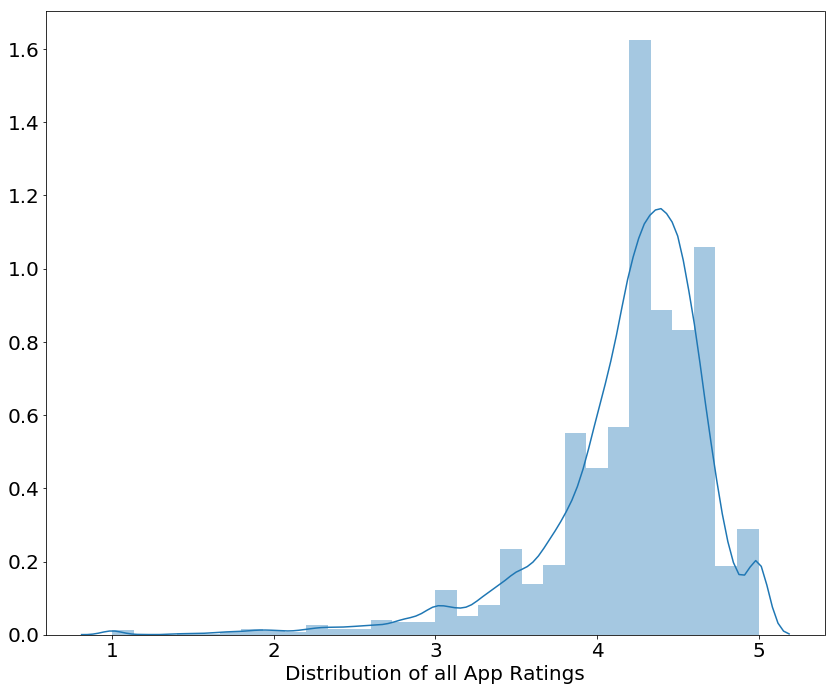

In [9]:
# Plotting the distribution of ratings for all Apps.
plt.figure(figsize=(12,10))
plt.rcParams.update({'font.size': 20})
sns.distplot(df['Rating'].dropna(),bins=30,axlabel='Distribution of all App Ratings')
plt.tight_layout()

#### Lets have a look at the Quantile Quantile plot or qqplot for short. This is an easier way to visualise the distribution by comparing the percentile values to a straight line that represents the normal curve.

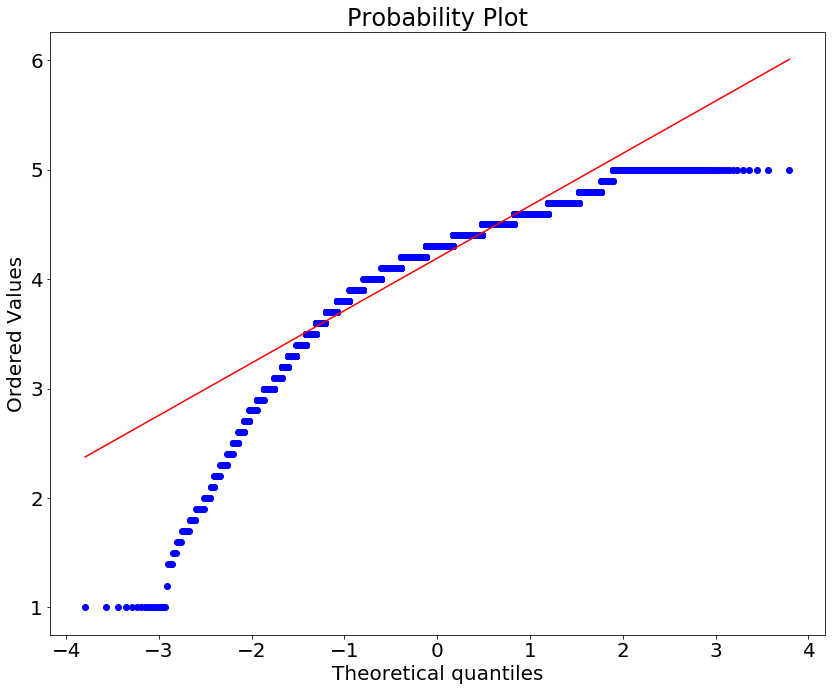

In [10]:
# Setting figure and font size.
plt.figure(figsize=(12,10))
plt.rcParams.update({'font.size': 20})

# plotting a qqplot to check for normality visually.
qqplot=stats.probplot(df['Rating'].dropna(), plot=sns.mpl.pyplot)
plt.tight_layout()

#### We already notice that our distribution is not normal.

Visualizations are nice but the best way to get an indication if our variable is normally distributed is to conduct a test of normality.

Before we conduct anymore tests we need to know for sure if our variable is normal or not. This helps us in deciding the type of tests we should use.

#### There are many different tests one can use to check for normality.
#### We shall be using two different methods to check for normality.
-  Shapiro-Wilk Test
-  D'Agostino's K^2 Test



    if distribution==normal:
        Parametrics tests
    else:
        Non-Parametric test

In [12]:
# Conducting the Shapiro-Wilk test to check for normality.
stat_sw,p_sw=stats.shapiro(df['Rating'].dropna())

#Comparing the p-value to the alpha value.
print('Statistics=%.3f, p=%.3f' % (stat_sw, p_sw))
alpha=0.05
print('\n')
if p_sw>alpha:
    print('Normal Distribution')
else:
    print('Non Normal Distribution')

Statistics=0.863, p=0.000


Non Normal Distribution


The **Shapiro-Wilk Test** states that our distribution is not normal.

We come to this conclusion as our p value is lower that our alpha value. The alpha value is a threshold value to compare our p value with.

The alpha value is the complmentary our significance value, which is usually 95% or 0.95. Hence the alpha is 1-0.95 or 0.05.

****

The next test for normality is the **D'Agostino's K^2** Test.

This caluclates the kurtosis and skew of a variable and depending on these values it comes to the conclusion of wetther a variable is normally distributed or not.

In [14]:
#Performing the D'Agostino's K^2 test to check for normality.
stat_da,p_da=stats.normaltest(df['Rating'].dropna())

#Comparing the p-value with the alpha value.
print('Statistics=%.3f, p=%.3f' % (stat_da, p_da))
print('\n')
if p_da>alpha:
    print('Normal Distribution')
else:
    print('Non Normal Distribution')

Statistics=3678.616, p=0.000


Non Normal Distribution


The reason we do two tests, is to get a second opinion.

The D'Agostino's K^2 also has a p value lower than our alpha value. Hence it has concluded that the variable is non normal.

#### I can transform our data to achieve normality. Although I shall not be doing so, as i would like to try out non-parametric tests on the variable.

***

Lets have a look at the category variable **Category** and see how many unique values we got.

In [15]:
# Visualising the counts for all the different categories.
df_category=df['Category'].value_counts()
df_category

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

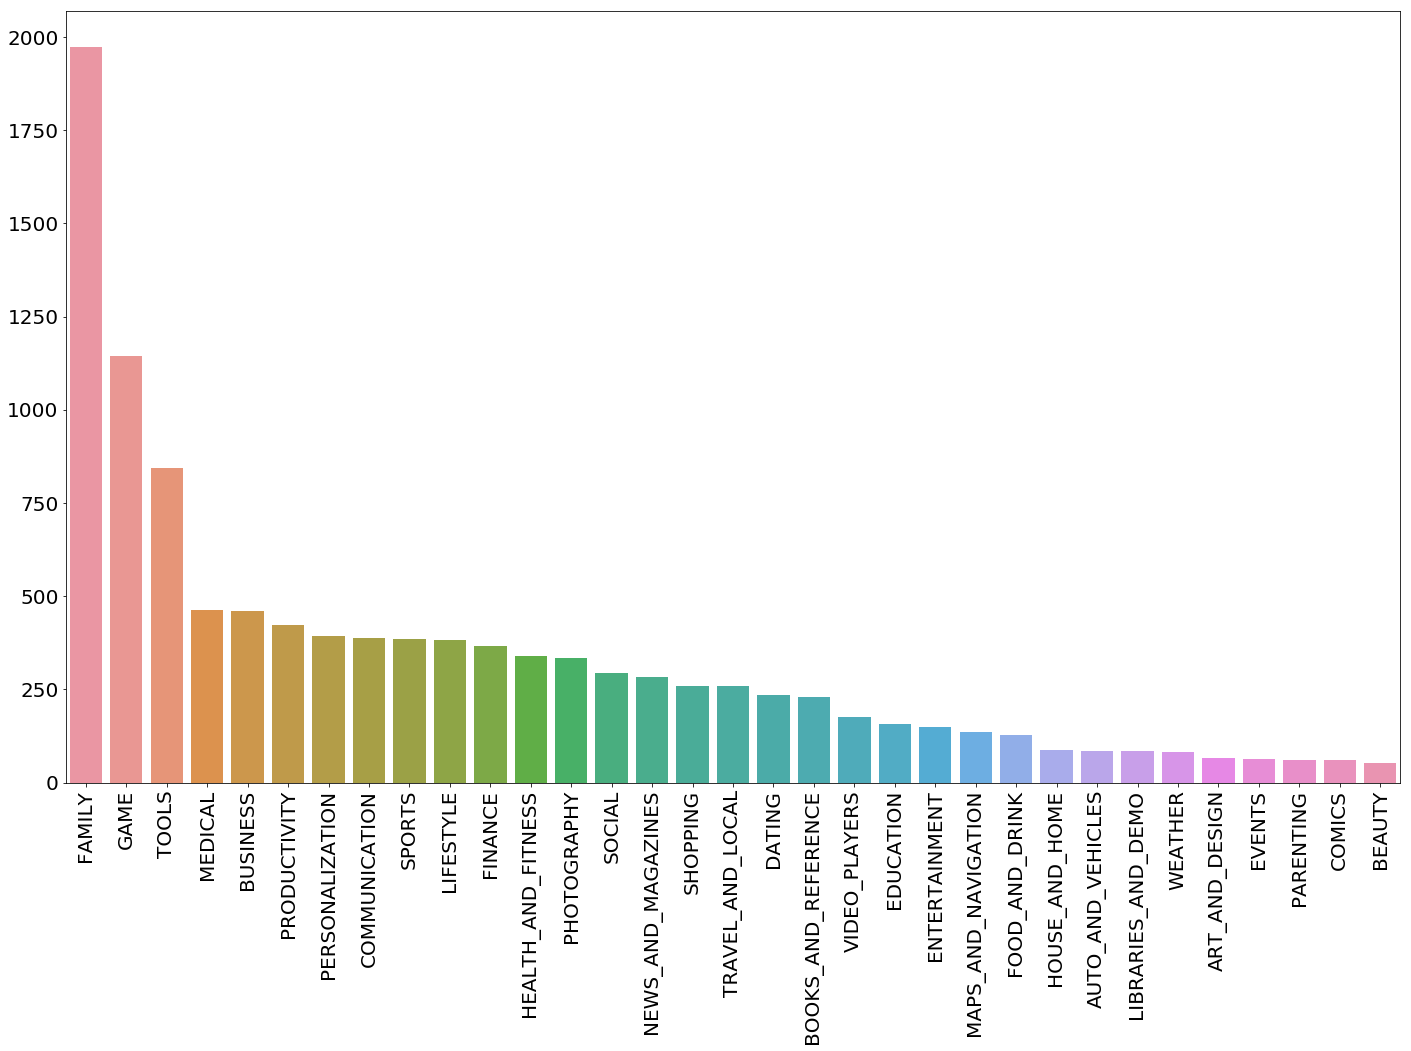

In [16]:
# Setting a figure size.
plt.figure(figsize=(20,15))

# Plotting a bar graph to easily see the difference in counts for all different categories.
sns.barplot(x=df_category.index,y=df_category.values)

# Adjustment of the X ticks to make them readable.
plt.xticks(rotation=90)
plt.rcParams.update({'font.size': 20})
plt.tight_layout()

### The top 3 categories for apps are FAMILY, GAME and TOOLS.

Lets further have a look at these categories and see what the mean, standard deviations,count,kurtosis and skew of the Ratings are.

In [18]:
#Calculating the mean, standard deviation and count of the ratings column for all the different categories and sorting.
grouped_category_df=df.groupby('Category').agg(['mean','median','std','count'])
grouped_category_df=grouped_category_df['Rating']
grouped_category_df.sort_values(['mean','std'],ascending=False,inplace=True)
grouped_category_df

# Calculating all the kurtosis values for all different categories.
kurtosis_value_list=[stats.kurtosis(df[df['Category']==category]['Rating'].dropna(),fisher=True) 
                     for category in grouped_category_df.index]
    
#Calculating all the skewness values for all different categories.
skew_value_list =[stats.skew(df[df['Category']==category]['Rating'].dropna()) 
                  for category in grouped_category_df.index]

# Making a dictionary so as to pass into a dataframe.    
skew_and_kurtosis={'Category':grouped_category_df.index,
                   'Kurtosis':kurtosis_value_list,
                   'Skew':skew_value_list}

# Making an display of the kurtosis and skew DataFrame.
skew_and_kurtosis_df=pd.DataFrame(skew_and_kurtosis)

# Resetting the index of skew and kurtosis dataframe so as to have category be the index.
skew_and_kurtosis_df.set_index('Category',inplace=True)

#Joining the two data frames.
grouped_category_df.join(skew_and_kurtosis_df)

,mean,median,std,count,Kurtosis,Skew
Category,,,,,,
EVENTS,4.435556,4.5,0.419499,45,2.239807,-1.057915
EDUCATION,4.389032,4.4,0.251894,155,0.053345,-0.516545
ART_AND_DESIGN,4.358065,4.4,0.358297,62,0.695369,-0.776921
BOOKS_AND_REFERENCE,4.346067,4.5,0.429046,178,1.238299,-1.146082
PERSONALIZATION,4.335987,4.4,0.352732,314,3.301190,-1.201928
PARENTING,4.300000,4.4,0.517845,50,6.205917,-2.023725
GAME,4.286326,4.4,0.365375,1097,11.703210,-2.236965
BEAUTY,4.278571,4.3,0.362603,42,0.855192,-0.673150
HEALTH_AND_FITNESS,4.277104,4.5,0.617822,297,4.294764,-2.036977


### Inferences:

-  The means more or less seem to be in the same range. Although the entire range of values that the variable **Rating** can take is quite small from just 1 to 5.

-  The skew are all negative indicating that all the distributions are negative or left skewed. This is due to the fact that the values of the **Rating** Variable being in the range of 0 to 5.

-  The kurtosis measures the sharpness in each distribution. The higher the kurtosis value, the more number of Apps in that category got a higher rating.

It is important to verify if these means are more or less the same or quite different from each other statistically.

We do this in two ways, visualise and quantify.

### Visualise: 

1) Plot the kde plot for all category distributions.

2) Plot histograms for individual categories, to help get an overall view as well.


### Quantify:

1) Conduct a One-Way Anova to test if the means are statistically the same or not.(Assuming the data is normal.)

2) If the means are not statistically the same. Conduct post hoc tests to find out  which which means are Statistically different.

### Visualising distributions of multiple groups.

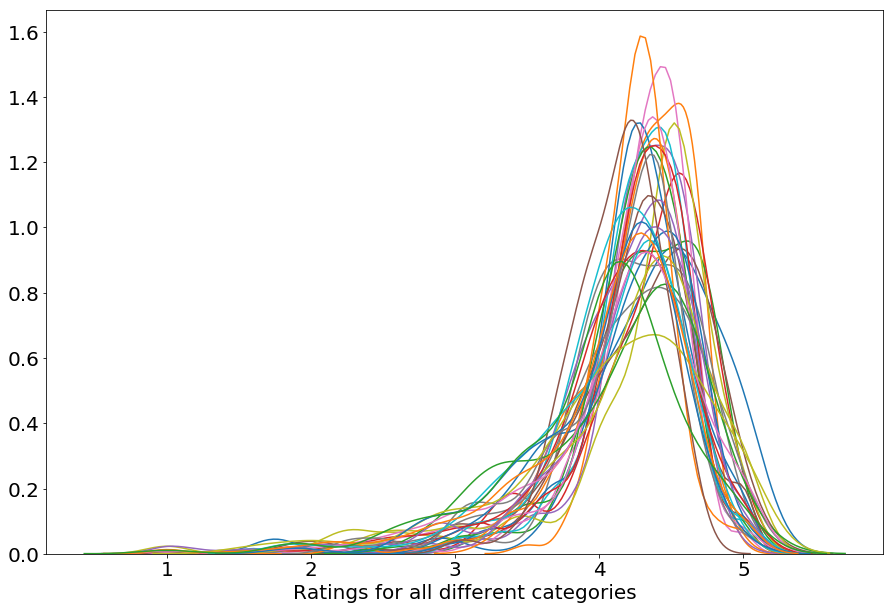

In [19]:
# Setting the figure size and font size.
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 20})

# iterating over all different categories and plotting the kde for all categories.
for category in grouped_category_df.index:
    sns.distplot(df[df['Category']==category]['Rating'].dropna(),hist=False,axlabel='Ratings for all different categories')

**I want to see the distributions for all the different categories. Lets see what kind of apps get the highest ratings more often than not.**
**We can tell what category of Apps did better by analysing the height and width of the histograms.**

#### We are looking for the histogram with:
-  Mean in the higher range
-  High and sharp peak
-  Lower tails of the distribution

**These are the three criteria for deciding the type of App most likely to be accepted by the Google Play Users.**

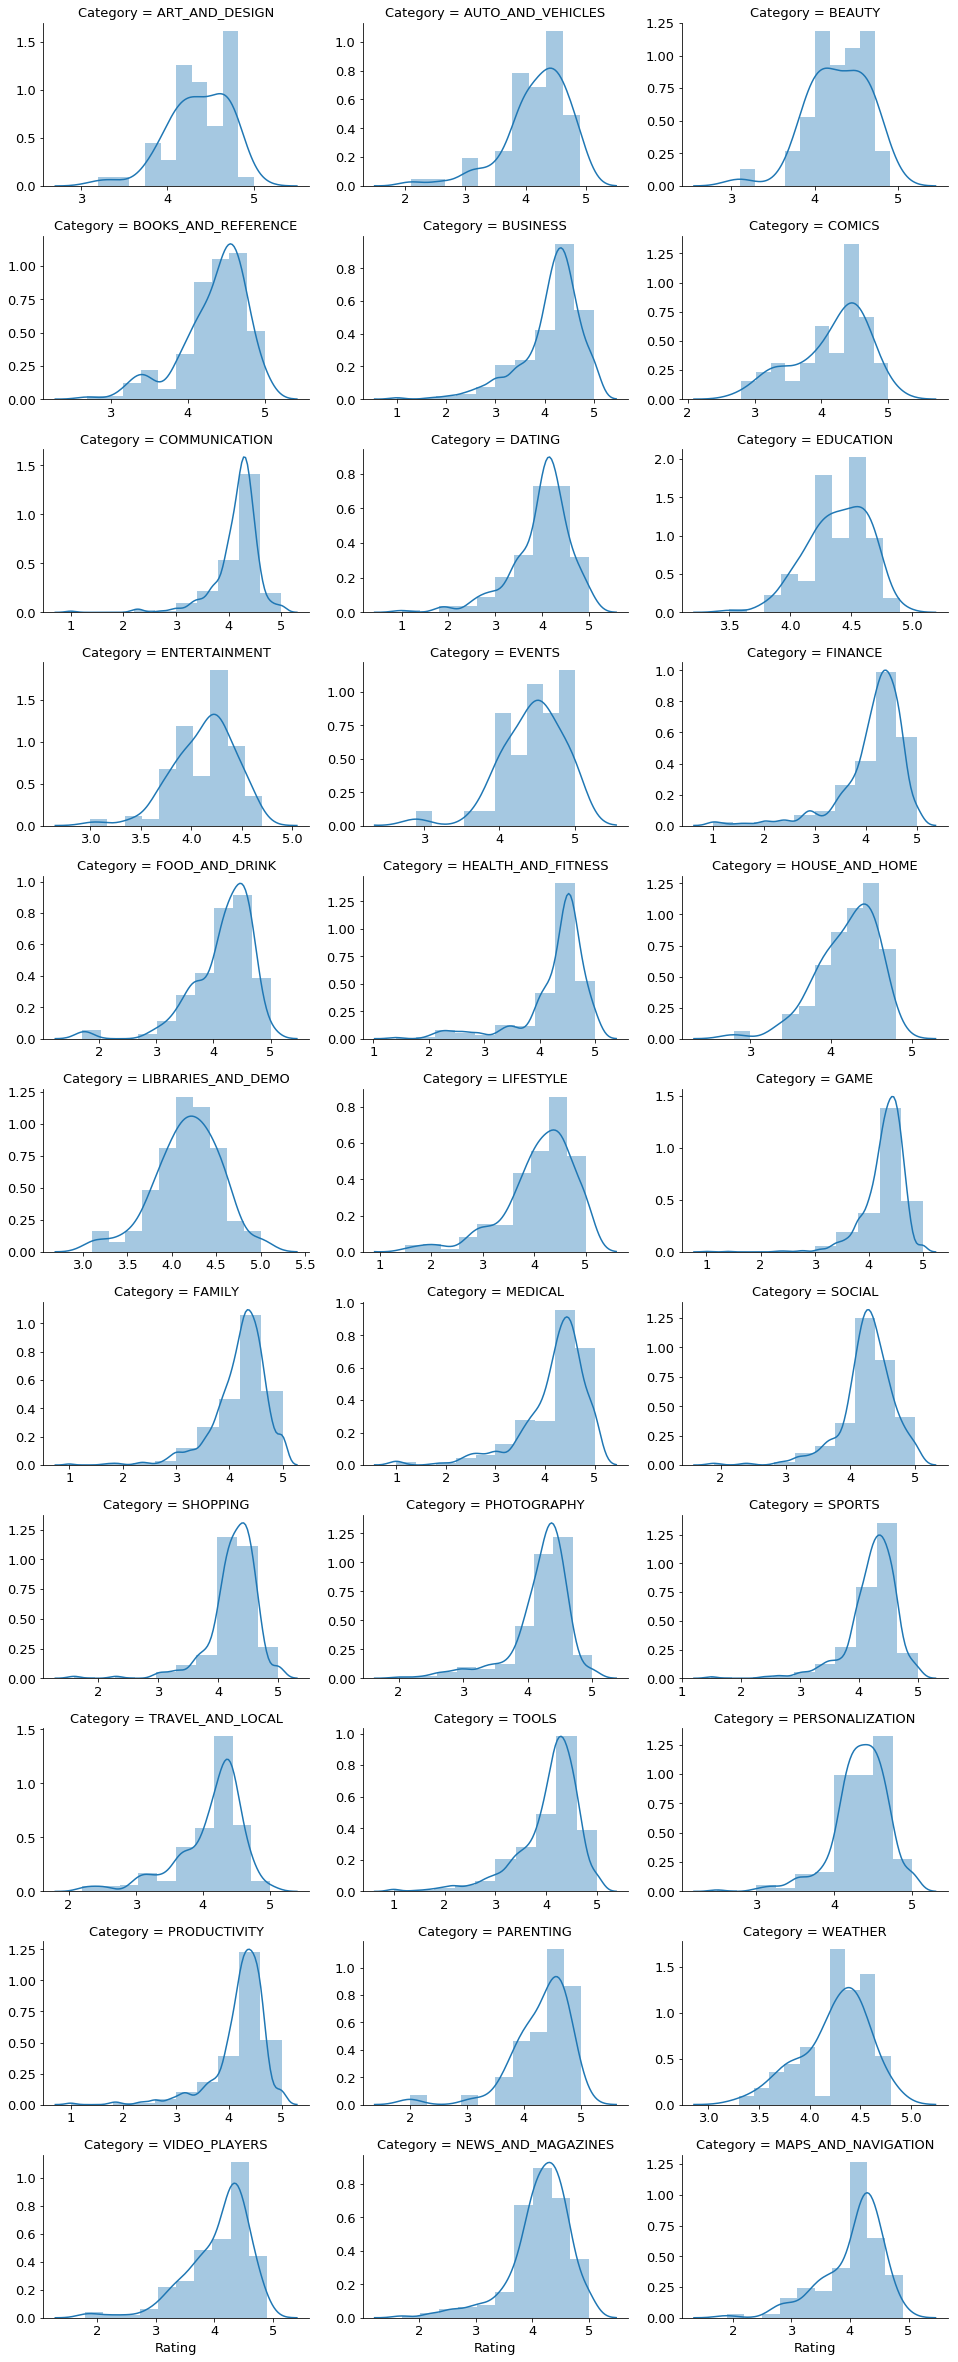

In [20]:
# Setting a decent font size for ease of readability.
plt.rcParams.update({'font.size': 13})

# Setting up the grid for all the distributions.
g = sns.FacetGrid(df, col = "Category",col_wrap=3,aspect=1.5,sharex=False,sharey=False)

#Plotting all the distributions.
g.map(sns.distplot,'Rating',bins=10)
plt.tight_layout()

#### By looking at these visualisations we can tell that most of the groups are more or less the same. Although this is only an  estimate. For concrete evidence we shall conduct an ANOVA(Analysis of Variance) test to quantiyfy our findings.

# A Statistical Approach

Lets conduct an ANOVA(Analysis of Variance). This is to test if the means of the different groups in the **Category** variable are either:

#### **A**=All the means of the different groups are statistically more or less the same. (Null Hypothesis)

#### **B**=One of the means is statistically different from another in the group. (Alternate Hypothesis)

The ANOVA test outputs an **F statistic** which is a function of the variablity between groups and variablity within groups.

We shall be conducting a specific type of ANOVA test called a One-way ANOVA test. Which basically tests if the means of the groups are the same across one factor. In this case it is the variable **Category**.

### Assumptions:

Before we do perform our test we need to check if the residuals from the relation between Category and Rating are normally distributed. This is an important assumption.

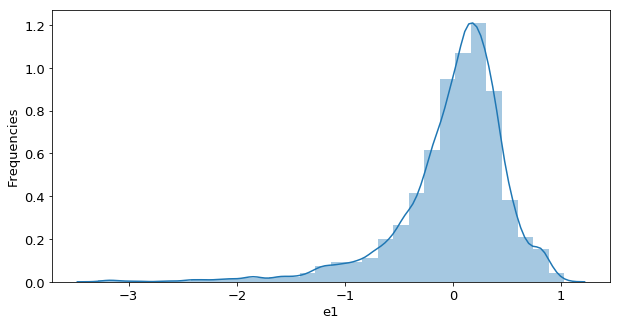

In [22]:
# Generating a linear model to see the relationship between Rating and Category variables.
model = ols("Rating ~ Category", df).fit()

#Getting the residual values for plotting and checking for normality.
residuals = statsmodels.regression.linear_model.RegressionResults.resid(model)
plt.figure(figsize=(10,5))
residuals_hist=sns.distplot(residuals,bins=30)
residuals_hist=residuals_hist.set(xlabel='e1', ylabel='Frequencies')

### We can clearly see that the residuals are not normally distributed.

#### Although we can see this visually we will need to quantify this as well. Hence i conducted a Shapiro-Wilk test on the residuals as well.

In [24]:
#Conducting shapiro test on residuals to check for normality.
W_statistic_residual,p_residual=stats.shapiro(residuals)

#Comaparing the p value with alpha.
print('\n')
if p_residual>alpha:
    print('Normal Distribution')
else:
    print('Non Normal Distribution')
print('\n')
print('W Statistic:',W_statistic_residual)
print('p-value:',p_residual)



Non Normal Distribution


W Statistic: 0.8773146867752075
p-value: 0.0


The **p-value** is less than our **alpha of 0.05**. Hence we reject the null hypothesis and accept the alternative. Which  is that the distribution is **not normal**.

#### In such scenarios where our data is not normal, we will have to resort to non-parametric tests. The non-parametric counterpart to the One-way ANOVA is the Kruskal-Wallis test.

### Assumptions:
For performing the **Kruskal-Wallis test** our data needs to be **ordinal or ranked**, which it is. It is scaled and takes values in the range of 0 to 5.

In [25]:
#Creating a list of arrays of all the rating values segregated by categories.
rating_list=[np.array(df[df['Category']==category]['Rating'].dropna()) for category in grouped_category_df.index]

#Assigning each list to its respective category and adding them into a dictionary.
grouped_category_values_dict=dict(zip(grouped_category_df.index,rating_list))

# Creating the final list that will be taken as input for the kruskal function.
args=[grouped_category_values_dict[grp] for grp in sorted(df['Category'].unique())]
kruskal_stat,kruskal_p=stats.kruskal(*args)

#Comparing with the value of alpha
if kruskal_p>alpha:
    print('Means are Statistically the same(Null Hypothesis)')
else:
    print('Means differ from one another(Alternate Hypothesis)')
print('\n')
print('H Statistic:',kruskal_stat)
print('p-value:', kruskal_p)

Means differ from one another(Alternate Hypothesis)


H Statistic: 327.47620565684366
p-value: 1.0632357570334694e-50


## Inference of Kruskal-Wallis test:

-  **The means are actually different from one another.**


-  **The reason we have a relatively high H statistic value, could be due to a high cardinality of the **Category** variable.**


-  **Similarly the reason for the p-value to be so low could be the same reason.**



The next step we need to take is to find which means are the most different from one another statistically. For doing this we will need to perform a post hoc test.

#### There are multiple tests one can perform  to see which means are actually different, I shall use a commonly used test for non normal distributions. These are non-parametric tests which dont need the assumption of the data to be normally distributed. 

-  **Duncan's Test(DMRT)**

## Brief on POST-HOC(After the test) testing:

We can actually do the ANOVA test to compare just two means to come to the conclusion of which means are statitically different from each other. Although there is one problem with such an approach. The type 1 error gets inflated for more the number of pairs we need to test. Hence the alpha value needs to be adjusted to take this into account. This is the grounds for doing the post hoc tests.

For every ANOVA test, we have a 5% chance of commiting a type I error, provided a significance level of 0.95. The number of tests we could have to conduc are also *33c2* or **528** different tests. This would significantly increase our type 1 error rate.

#### A post hoc test of ANOVA does exactly just this and adjusts the alpha value according to the least number of pairs compared.

***

# POST HOC Testing

### 1) Duncan's Test (DMRT)

-  The **Duncan's test** does a series of comparison between two means. The result of each test leads to the conclusion of which two means are to be tested next.


-  It compares these means with an alpha level which is a value derived from a function of *p-2*. Where p is the number of different groups.


-  The input is a list of means and the output are subsets of all the means that are statistically the same. Hence we can conclude that each subset is statistically different from each other.


-  This test is a good choice for our scenario as our data is not normal and also the number of observations per group are not similar. Hence the reason to select the **Duncan's Test**.

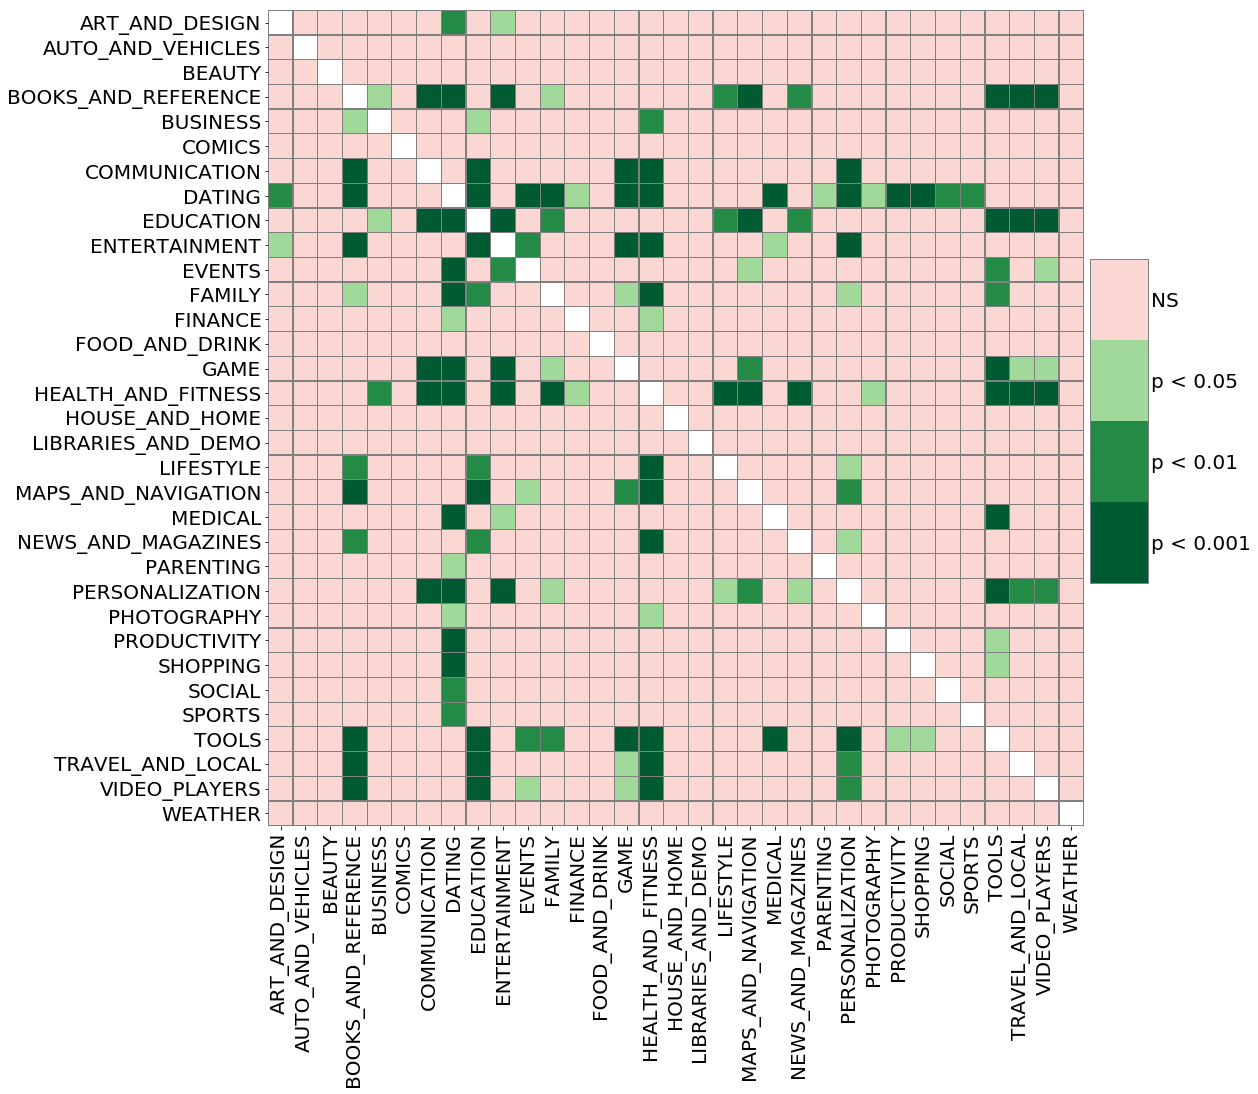

In [26]:
# Setting the size of the heat map and font size.
plt.figure(figsize=(20,15))
plt.rcParams.update({'font.size': 20})

#Creating a dataframe that shows how the meaans of different categories differ from each other.
post_hoc_dunn=sp.posthoc_dunn(a=df,val_col='Rating',group_col='Category',p_adjust='holm',sort=True)

#Setting some heatmap arguments along with creating the actual heatmap using the scikit-posthocs library.
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
dunn_test_sign_plot=sp.sign_plot(post_hoc_dunn, **heatmap_args)

## Inferences:

-  From looking at heatmap we can tell that the category **DATING** seems to be the most different from all other categories. We can also confirm this by looking at the means. It is the only category with a mean below 4.


-  We also notice that the means of  categories **TOOLS**, **TRAVEL_AND_LOCAL** and **VIDEO_PLAYERS** are in general quite different from **BOOKS_AND_REFERENCES**,**EDUCATION**,**HEALTH_AND_FITNESS** and **PERSONALIZATION**. This could be due to the fact that Apps that are from the first subset are more for general purpose, and the Apps of the second subset are more for self development and personalization.



**Subset 1 = {Tools, Travel and Local, Video Players}**


**Subset 2 = {Books and References, Education, Health and Fitness, Personalization}**



-  By observing the means of these subsets, we notice that people dont like the Apps from the first subset. This could be a potential option for developing an App in as most of the Apps in these categories are not upto a certain mark.


-  The means of the second subset are relatively higher when comapred to the first subset. This indicates that the market in these categories are saturated and probably not a good option for developing an App in.


-  Another perspective could also be that most people tend to download apps for self development compared to general purpose. We can verify if this is the case by looking at the count for both subsets.


-  By comparing the counts of both subsets. People tend to rate Apps from the first subset more often than people do so for the second subset. This compared with the relatively lower rating could indicates that people are generally unhappy with the Apps from the first Subset.


-  Hence by this logic we approximate that developing an App in the categories of **TOOLS**, **TRAVEL_AND_LOCAL** and **VIDEO_PLAYERS** would be a relatively safe bet.

***